In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.sans-serif'] = ['simhei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [6]:
import sklearn
import sklearn.datasets

data = sklearn.datasets.fetch_california_housing()
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [12]:
chouse = pd.DataFrame(data=data.data, columns=data.feature_names)
chouse

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [38]:
chouse_target = pd.DataFrame(data.target, columns=data.target_names)
chouse_target['HighLowHouseVal'] = 0
chouse_target['HighLowHouseVal'][chouse_target['MedHouseVal'] > chouse_target['MedHouseVal'].median()] = 1
print(chouse_target['HighLowHouseVal'].sum())
chouse_target

10317


C:\Users\wangy\AppData\Local\Temp\ipykernel_1616\803990853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chouse_target['HighLowHouseVal'][chouse_target['MedHouseVal']>chouse_target['MedHouseVal'].median()] = 1


,MedHouseVal,HighLowHouseVal
0,4.526,1
1,3.585,1
2,3.521,1
3,3.413,1
4,3.422,1
...,...,...
20635,0.781,0
20636,0.771,0
20637,0.923,0
20638,0.847,0


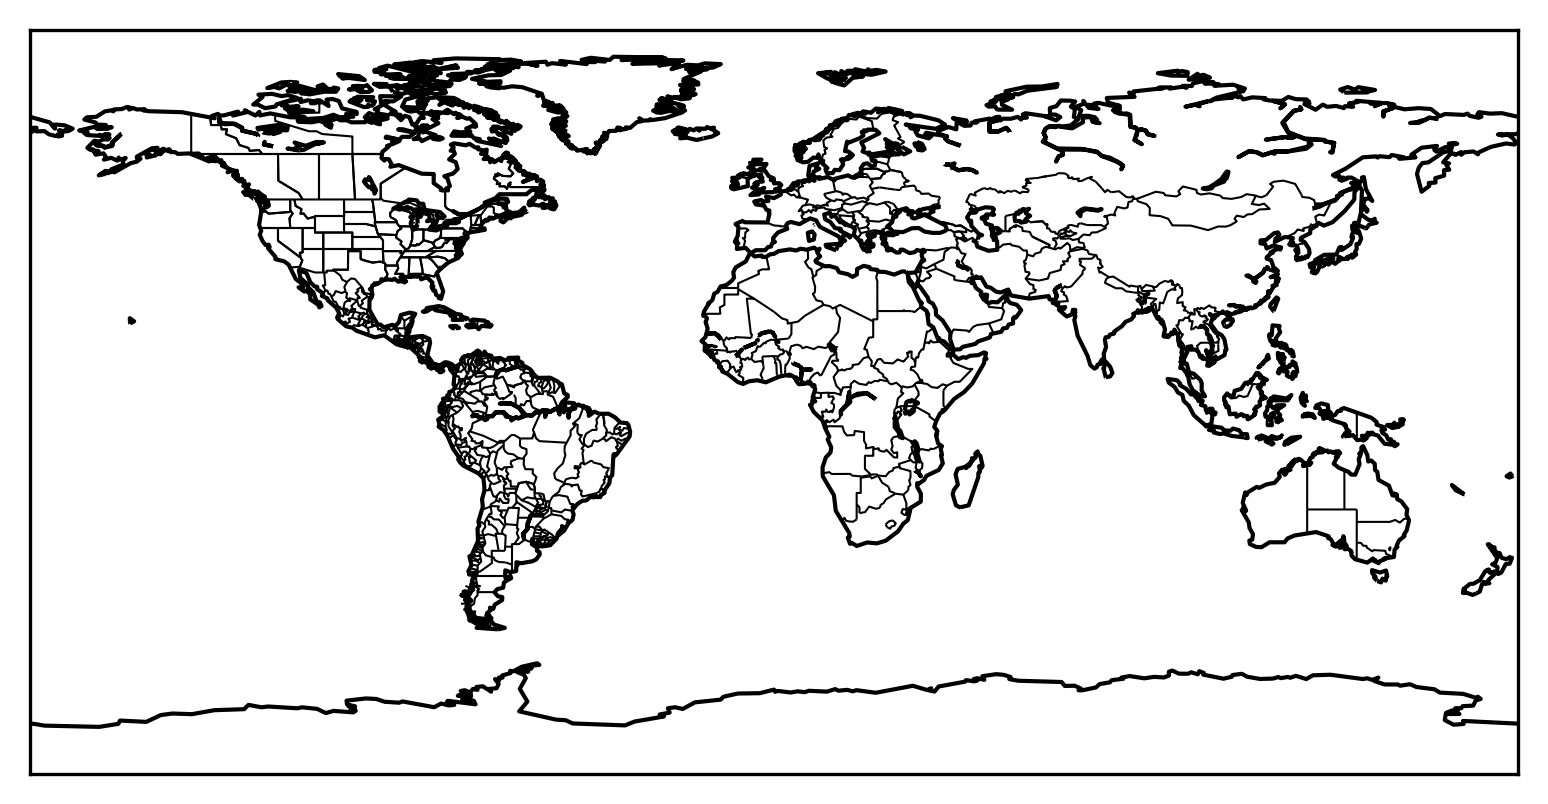

In [11]:
import mpl_toolkits
from mpl_toolkits.basemap import Basemap

plt.rcdefaults()
plt.rcParams['figure.dpi'] = 300
m = Basemap()
m.drawcoastlines()
m.drawstates()
m.drawcountries()
plt.show()

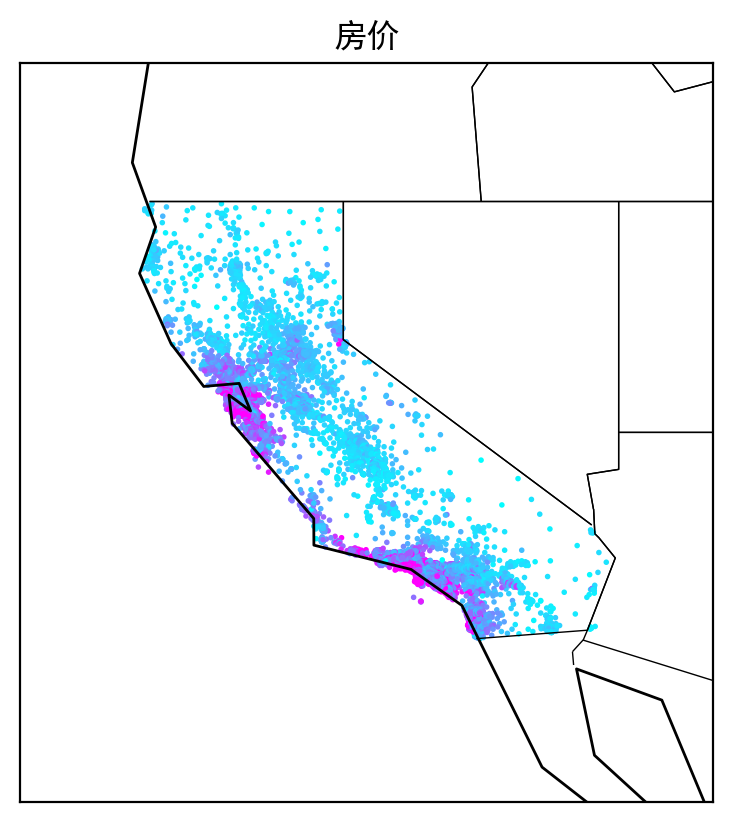

In [20]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.sans-serif'] = ['Simhei']
la_min = 32 - 3
la_max = 42 + 3
lon_min = -124 - 3
lon_max = -115 + 3
fmap = Basemap(llcrnrlat=la_min,
               urcrnrlat=la_max,
               llcrnrlon=lon_min,
               urcrnrlon=lon_max)
fmap.drawcoastlines()
fmap.drawstates()
fmap.drawcountries()
lon_list = chouse.Longitude.values.flatten()
lat_list = chouse.Latitude.values.flatten()
fmap.scatter(lon_list, lat_list, s=1, cmap="cool",
             c=chouse_target.values.flatten())
plt.title("房价")
plt.show()

In [19]:
lon_list.max(), lon_list.min(), lat_list.max(), lat_list.min()

(-114.31, -124.35, 41.95, 32.54)

In [21]:
# 准备数据
scale = 100
disp_x = np.linspace(lon_min, lon_max, scale + 1)
disp_y = np.linspace(la_min, la_max, scale + 1)
disp_x, disp_y = np.meshgrid(disp_x, disp_y)
disp_input = np.vstack((disp_x.flatten(), disp_y.flatten())).T
disp_input

array([[-127.  ,   29.  ],
       [-126.85,   29.  ],
       [-126.7 ,   29.  ],
       ...,
       [-112.3 ,   45.  ],
       [-112.15,   45.  ],
       [-112.  ,   45.  ]])

C:\Users\wangy\AppData\Local\Temp\ipykernel_1616\1113293921.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  fmap.scatter(disp_input[:, 0], disp_input[:, 1], cmap='gray', alpha=0.1, s=2)


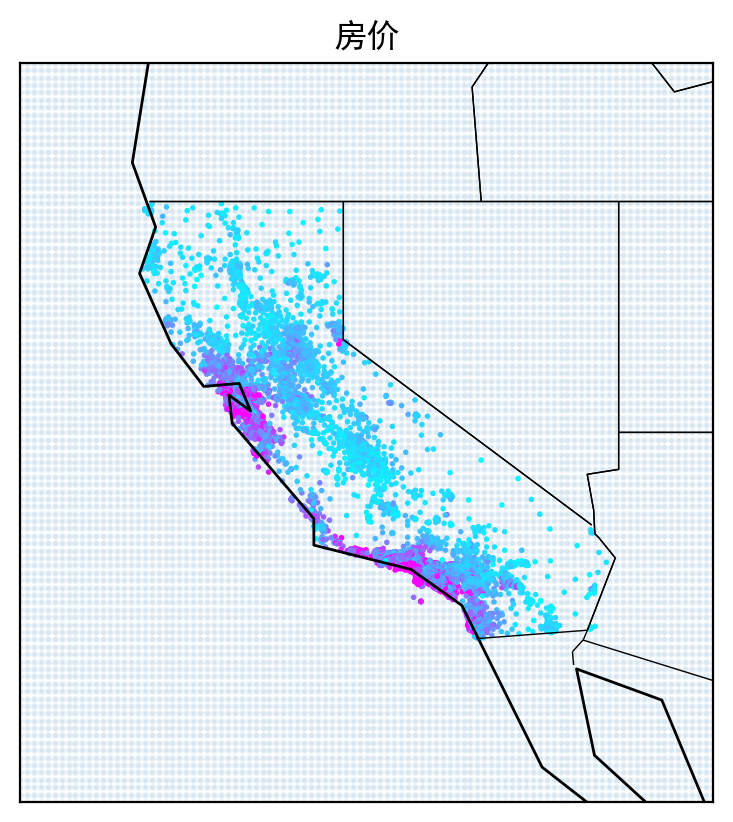

In [26]:
fmap = Basemap(llcrnrlat=la_min,
               urcrnrlat=la_max,
               llcrnrlon=lon_min,
               urcrnrlon=lon_max)
fmap.drawcoastlines()
fmap.drawstates()
fmap.drawcountries()
lon_list = chouse.Longitude.values.flatten()
lat_list = chouse.Latitude.values.flatten()
fmap.scatter(disp_input[:, 0], disp_input[:, 1], cmap='gray', alpha=0.1, s=2)
fmap.scatter(lon_list, lat_list, s=1, cmap="cool",
             c=chouse_target.values.flatten())
plt.title("房价")
plt.show()

0.5287790697674418


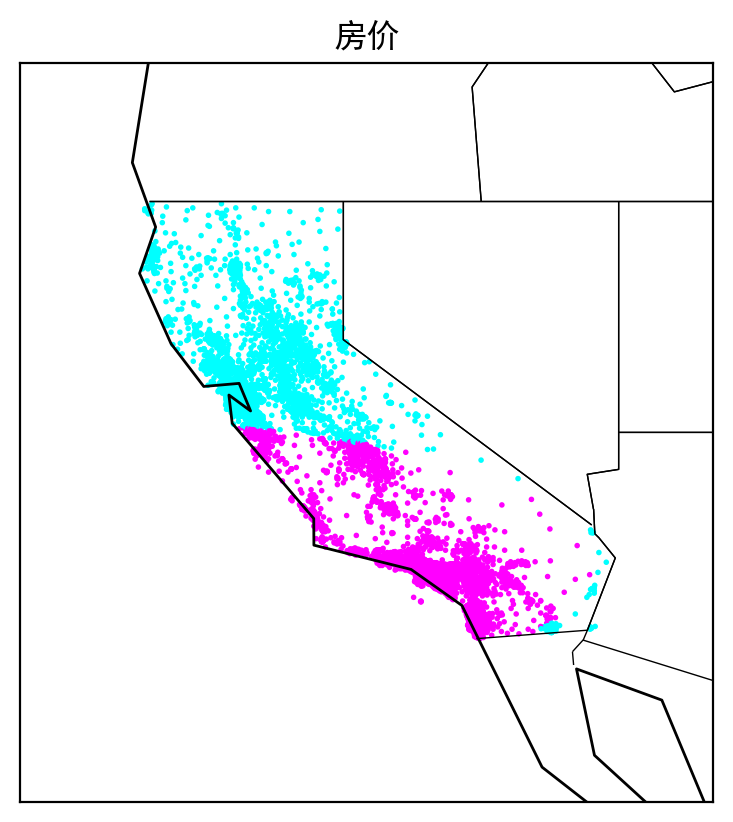

In [42]:
from sklearn import naive_bayes

model = naive_bayes.GaussianNB()
model.fit(chouse[['Longitude', 'Latitude']], chouse_target['HighLowHouseVal'].values)
print(model.score(chouse[['Longitude', 'Latitude']], chouse_target['HighLowHouseVal'].values))
model_val = model.predict(chouse[['Longitude', 'Latitude']])
fmap = Basemap(llcrnrlat=la_min,
               urcrnrlat=la_max,
               llcrnrlon=lon_min,
               urcrnrlon=lon_max)
fmap.drawcoastlines()
fmap.drawstates()
fmap.drawcountries()
lon_list = chouse.Longitude.values.flatten()
lat_list = chouse.Latitude.values.flatten()
# fmap.scatter(disp_input[:, 0], disp_input[:, 1], cmap='gray', alpha=0.1, s=2)
fmap.scatter(lon_list, lat_list, s=1, cmap="cool",
             c=model_val)
plt.title("房价")
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


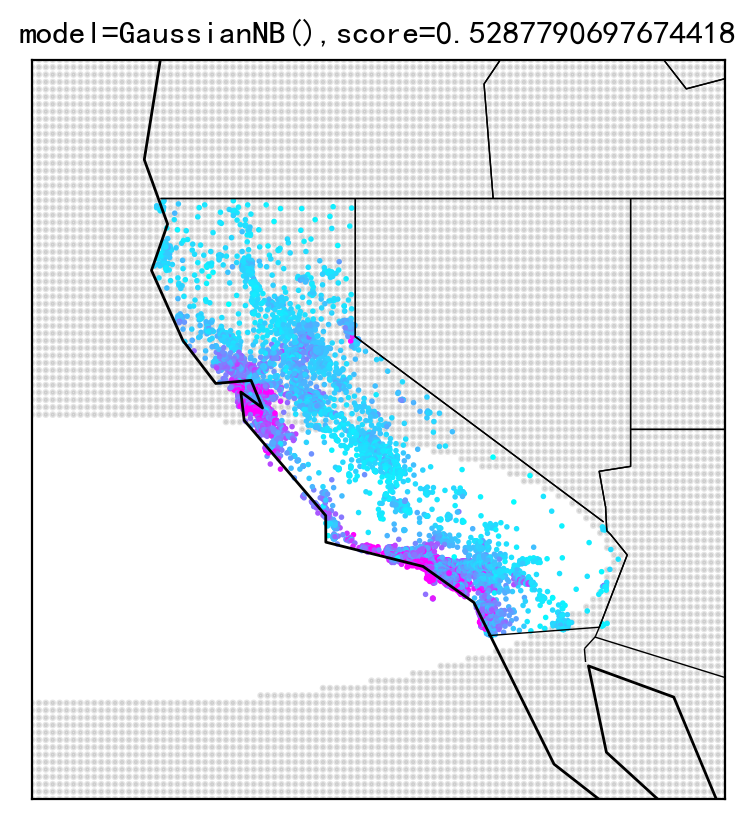

In [44]:
from sklearn import naive_bayes

model = naive_bayes.GaussianNB()
model.fit(chouse[['Longitude', 'Latitude']], chouse_target['HighLowHouseVal'].values)
disp_output = model.predict(disp_input)
fmap = Basemap(llcrnrlat=la_min,
               urcrnrlat=la_max,
               llcrnrlon=lon_min,
               urcrnrlon=lon_max)
fmap.drawcoastlines()
fmap.drawstates()
fmap.drawcountries()
lon_list = chouse.Longitude.values.flatten()
lat_list = chouse.Latitude.values.flatten()
fmap.scatter(disp_input[:, 0], disp_input[:, 1], cmap='gray',
             c=disp_output, alpha=0.1, s=2)
fmap.scatter(lon_list, lat_list, s=1, cmap="cool",
             c=chouse_target['MedHouseVal'].values)
plt.title("model={},score={}".format(model,
                                     model.score(chouse[['Longitude', 'Latitude']],
                                                 chouse_target['HighLowHouseVal'].values)))
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


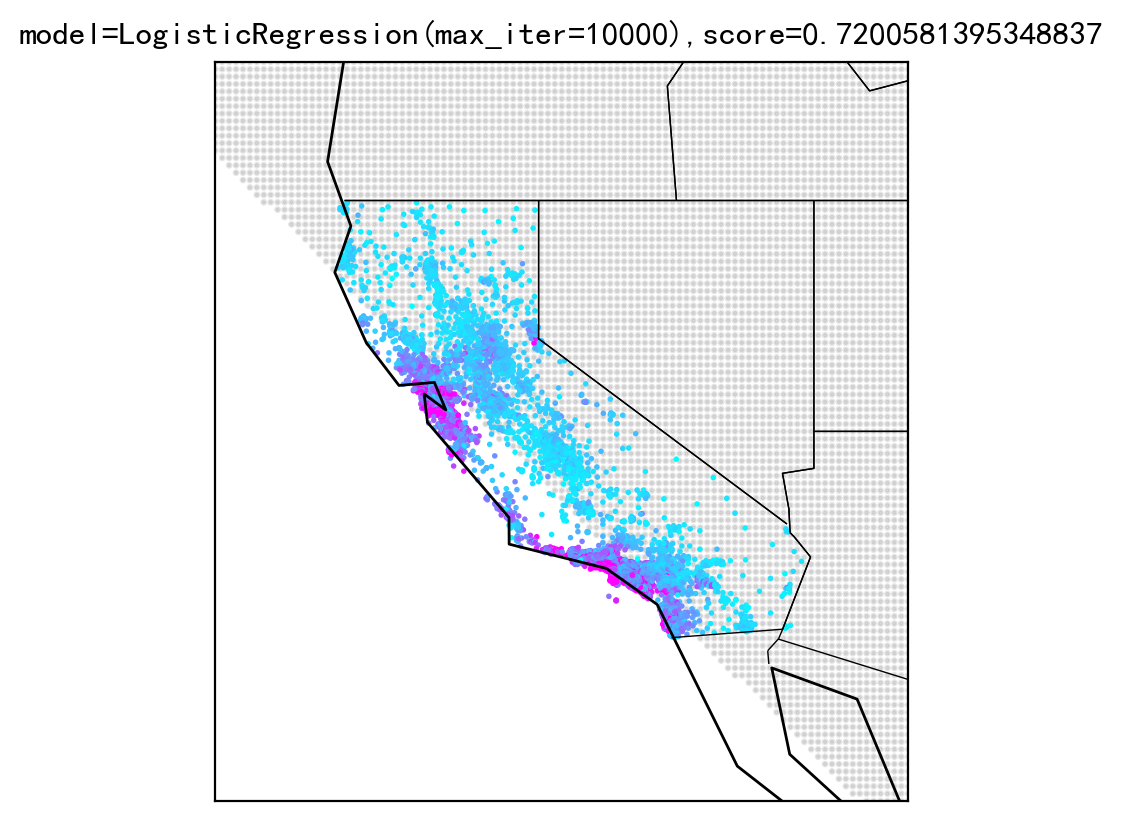

In [47]:
from sklearn import linear_model

model = linear_model.LogisticRegression(max_iter=10000)
model.fit(chouse[['Longitude', 'Latitude']], chouse_target['HighLowHouseVal'].values)
disp_output = model.predict(disp_input)
fmap = Basemap(llcrnrlat=la_min,
               urcrnrlat=la_max,
               llcrnrlon=lon_min,
               urcrnrlon=lon_max)
fmap.drawcoastlines()
fmap.drawstates()
fmap.drawcountries()
lon_list = chouse.Longitude.values.flatten()
lat_list = chouse.Latitude.values.flatten()
fmap.scatter(disp_input[:, 0], disp_input[:, 1], cmap='gray',
             c=disp_output, alpha=0.1, s=2)
fmap.scatter(lon_list, lat_list, s=1, cmap="cool",
             c=chouse_target['MedHouseVal'].values)
plt.title("model={},score={}".format(model,
                                     model.score(chouse[['Longitude', 'Latitude']],
                                                 chouse_target['HighLowHouseVal'].values)))
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


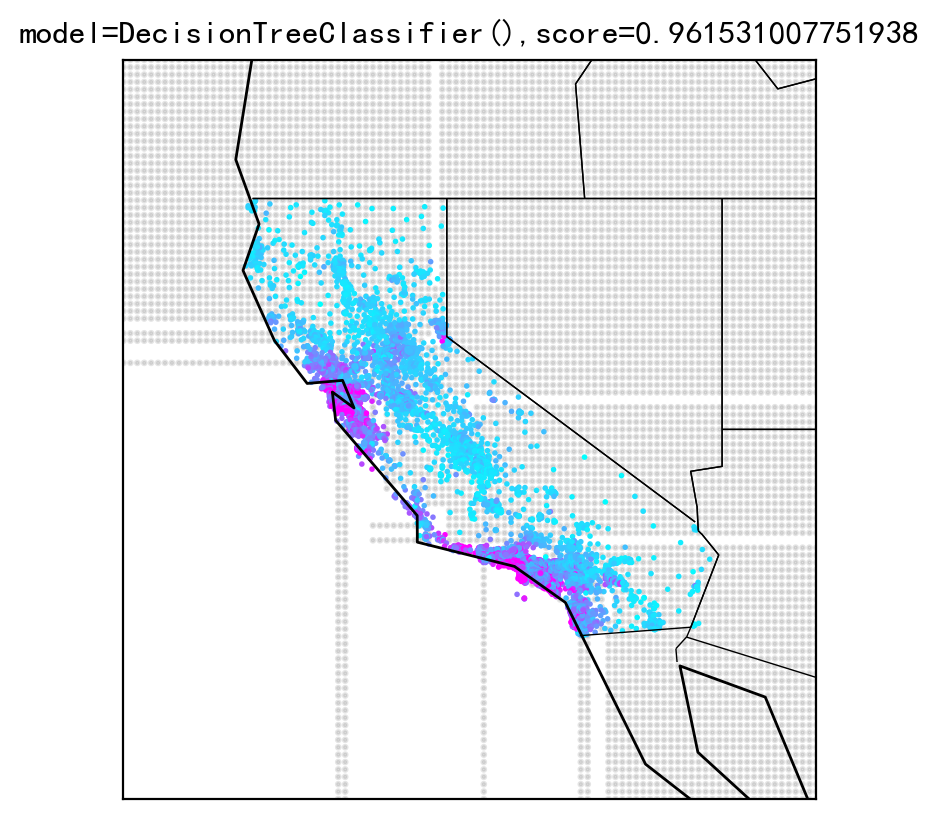

In [50]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(chouse[['Longitude', 'Latitude']], chouse_target['HighLowHouseVal'].values)
disp_output = model.predict(disp_input)
fmap = Basemap(llcrnrlat=la_min,
               urcrnrlat=la_max,
               llcrnrlon=lon_min,
               urcrnrlon=lon_max)
fmap.drawcoastlines()
fmap.drawstates()
fmap.drawcountries()
lon_list = chouse.Longitude.values.flatten()
lat_list = chouse.Latitude.values.flatten()
fmap.scatter(disp_input[:, 0], disp_input[:, 1], cmap='gray',
             c=disp_output, alpha=0.1, s=2)
fmap.scatter(lon_list, lat_list, s=1, cmap="cool",
             c=chouse_target['MedHouseVal'].values)
plt.title("model={},score={}".format(model,
                                     model.score(chouse[['Longitude', 'Latitude']],
                                                 chouse_target['HighLowHouseVal'].values)))
plt.show()

[Text(0.6433176697808644, 0.98, 'X[1] <= 37.955\ngini = 0.5\nsamples = 20640\nvalue = [10323, 10317]'),
 Text(0.34488818473498545, 0.94, 'X[0] <= -121.655\ngini = 0.494\nsamples = 17249\nvalue = [7649, 9600]'),
 Text(0.04586761367291363, 0.9, 'X[0] <= -122.375\ngini = 0.296\nsamples = 3725\nvalue = [672, 3053]'),
 Text(0.009091688824084398, 0.86, 'X[0] <= -122.435\ngini = 0.053\nsamples = 807\nvalue = [22, 785]'),
 Text(0.004031220516339308, 0.82, 'X[0] <= -122.485\ngini = 0.021\nsamples = 467\nvalue = [5, 462]'),
 Text(0.0036881379192040486, 0.78, 'gini = 0.0\nsamples = 156\nvalue = [0, 156]'),
 Text(0.004374303113474569, 0.78, 'X[1] <= 37.83\ngini = 0.032\nsamples = 311\nvalue = [5, 306]'),
 Text(0.0025731194785144525, 0.74, 'X[1] <= 37.695\ngini = 0.026\nsamples = 301\nvalue = [4, 297]'),
 Text(0.001029247791405781, 0.7, 'X[1] <= 37.665\ngini = 0.075\nsamples = 51\nvalue = [2, 49]'),
 Text(0.0006861651942705207, 0.66, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.00137233038

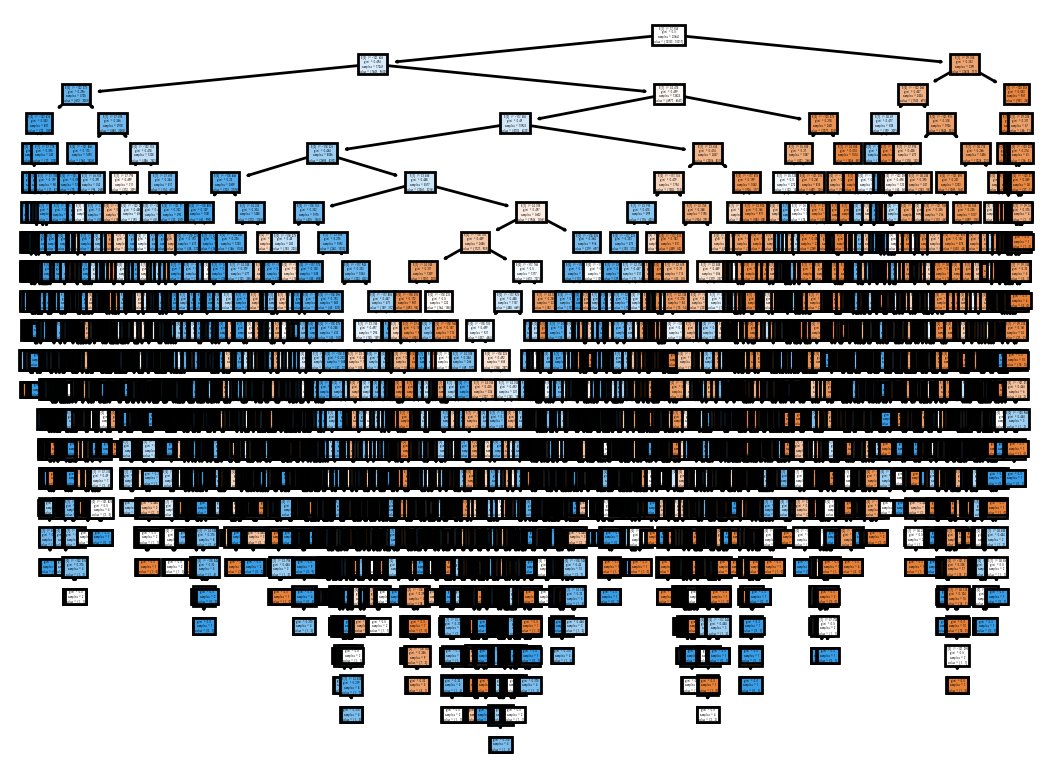

In [55]:
from sklearn.tree import plot_tree
plot_tree(model, filled=True)

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


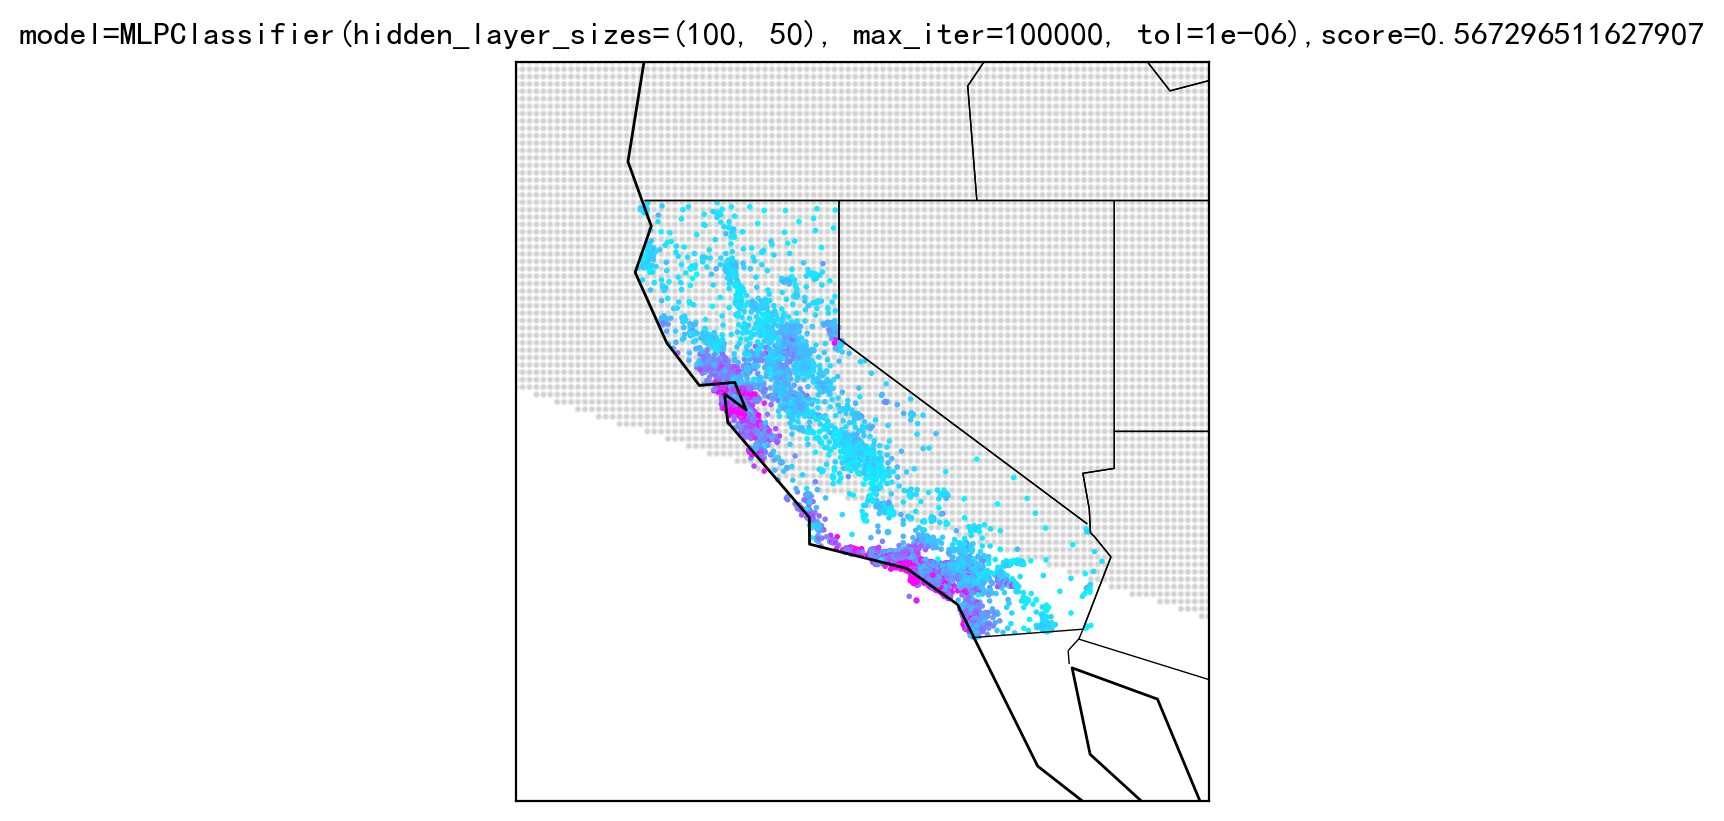

In [64]:
from sklearn import neural_network

model = neural_network.MLPClassifier(hidden_layer_sizes=(100,50),
                                     max_iter=100000,
                                     tol=1e-6)
model.fit(chouse[['Longitude', 'Latitude']], chouse_target['HighLowHouseVal'].values)
disp_output = model.predict(disp_input)
fmap = Basemap(llcrnrlat=la_min,
               urcrnrlat=la_max,
               llcrnrlon=lon_min,
               urcrnrlon=lon_max)
fmap.drawcoastlines()
fmap.drawstates()
fmap.drawcountries()
lon_list = chouse.Longitude.values.flatten()
lat_list = chouse.Latitude.values.flatten()
fmap.scatter(disp_input[:, 0], disp_input[:, 1], cmap='gray',
             c=disp_output, alpha=0.1, s=2)
fmap.scatter(lon_list, lat_list, s=1, cmap="cool",
             c=chouse_target['MedHouseVal'].values)
plt.title("model={},score={}".format(model,
                                     model.score(chouse[['Longitude', 'Latitude']],
                                                 chouse_target['HighLowHouseVal'].values)))
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


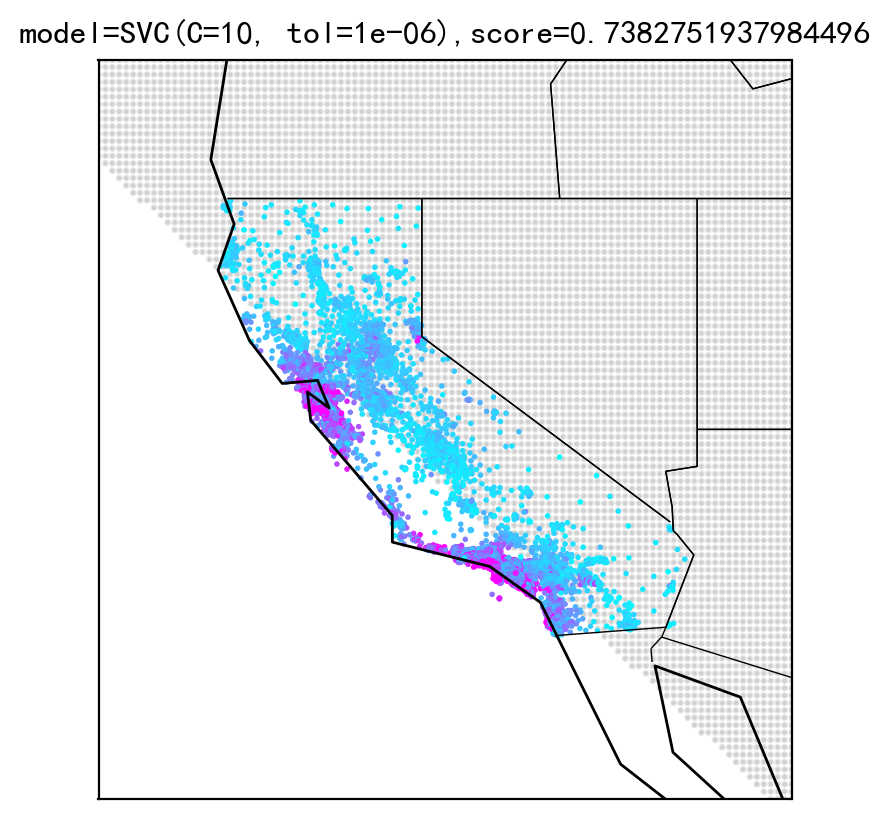

In [65]:
from sklearn import svm

model = svm.SVC(C=10, tol=1e-6)
model.fit(chouse[['Longitude', 'Latitude']], chouse_target['HighLowHouseVal'].values)
disp_output = model.predict(disp_input)
fmap = Basemap(llcrnrlat=la_min,
               urcrnrlat=la_max,
               llcrnrlon=lon_min,
               urcrnrlon=lon_max)
fmap.drawcoastlines()
fmap.drawstates()
fmap.drawcountries()
lon_list = chouse.Longitude.values.flatten()
lat_list = chouse.Latitude.values.flatten()
fmap.scatter(disp_input[:, 0], disp_input[:, 1], cmap='gray',
             c=disp_output, alpha=0.1, s=2)
fmap.scatter(lon_list, lat_list, s=1, cmap="cool",
             c=chouse_target['MedHouseVal'].values)
plt.title("model={},score={}".format(model,
                                     model.score(chouse[['Longitude', 'Latitude']],
                                                 chouse_target['HighLowHouseVal'].values)))
plt.show()